In [27]:
# import pandas as pd
# import numpy as np

# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (14, 8)
# plt.rcParams["figure.dpi"] = 80

In [28]:
# from pymc_marketing.mmm import MMM, GeometricAdstock, LogisticSaturation

In [29]:
# df = pd.read_csv("../data/processed/marketing_sales_spending.csv")

In [30]:
# df.head(50)

In [31]:
# sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr())
# plt.tight_layout()

In [32]:
# df.columns

In [33]:
# df.sales.plot(x="wk_in_yr_nbr", marker='.')

#### Media Spend `(prefix=’mdsp_’)`
Spend of 13 media channels: `direct mail`, `insert`, `newspaper`, `digital audio`, `radio`, `TV`, `digital video`, `social media`, `online display`, `email`, `SMS`, `affiliates`, `SEM`.

In [34]:
# cols_spend = ['mdsp_dm', 'mdsp_inst', 'mdsp_nsp',
#             #   'mdsp_auddig', 'mdsp_audtr', 'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so',
#             #   'mdsp_on', 'mdsp_sem'
#             ]

# df[cols_spend].plot(marker='.');

In [35]:
# cols_impressions = ['mdip_dm', 'mdip_inst', 'mdip_nsp', 'mdip_auddig', 'mdip_audtr',
#                     'mdip_vidtr', 'mdip_viddig', 'mdip_so', 'mdip_on', 'mdip_em',
#                     'mdip_sms', 'mdip_aff', 'mdip_sem']

# df[cols_impressions].plot(marker='.');

In [36]:
# pd.concat((df[cols_impressions].sum(axis=1), df.sales), axis=1).plot(marker='.');

In [37]:
# # plot histograms of all numeric columns
# df[cols_spend].hist(bins=50);

In [38]:
# df[cols_impressions].hist(bins=50);

In [39]:
# df["sales"].hist(bins=50);

In [40]:
# import numpy as np
# from scipy.stats import weibull_min

# def adstock(x, kind="geometric", alpha=None, delay=0, shape=None, scale=None, normalize=True):
#     """
#     Apply adstock (carryover) transformation to a media time series.

#     Supported adstock variants
#     ---------------------------
#     - 'geometric'        : immediate geometric decay
#     - 'delayed_geometric': geometric decay with fixed delay
#     - 'weibull_pdf'      : delayed peak and decay
#     - 'weibull_cdf'      : long-tail carryover
#     - 'none'             : no carryover

#     Parameters
#     ----------
#     x : array-like, shape (T,)
#         Media input over time (spend or impressions). Must be non-negative.

#     kind : str, default="geometric"
#         Adstock kernel type.

#     alpha : float in [0, 1), optional
#         Geometric decay parameter. Required for geometric variants.

#     delay : int >= 0, default=0
#         Number of time steps before carryover begins.
#         Useful for channels with delayed response (e.g., direct mail).

#     shape : float > 0, optional
#         Weibull shape parameter (Weibull variants only).

#     scale : float > 0, optional
#         Weibull scale parameter controlling memory length.

#     normalize : bool, default=True
#         Whether to normalize convolution weights to sum to 1.

#     Returns
#     -------
#     adstocked : np.ndarray, shape (T,)
#         Adstocked media pressure time series.

#     Notes
#     -----
#     - Delayed geometric adstock is preferred when impact starts after a
#       known lag but then decays exponentially.
#     - In Bayesian MMM, delay should be fixed or tightly constrained.
#     """

#     x = np.asarray(x, dtype=float)
#     T = len(x)

#     if kind == "none":
#         return x

#     if kind in ("geometric", "delayed_geometric"):
#         if alpha is None:
#             raise ValueError("alpha must be provided for geometric adstock")

#         adstocked = np.zeros_like(x)

#         for t in range(T):
#             if kind == "delayed_geometric" and t < delay:
#                 adstocked[t] = 0
#             else:
#                 prev = adstocked[t-1] if t > 0 else 0
#                 adstocked[t] = x[t-delay] + alpha * prev if t >= delay else 0

#         return adstocked

#     # Weibull-based adstock
#     lags = np.arange(T)

#     if shape is None or scale is None:
#         raise ValueError("shape and scale must be provided for Weibull adstock")

#     if kind == "weibull_pdf":
#         weights = weibull_min.pdf(lags, c=shape, scale=scale)

#     elif kind == "weibull_cdf":
#         weights = 1 - weibull_min.cdf(lags, c=shape, scale=scale)

#     else:
#         raise ValueError(f"Unknown adstock kind: {kind}")

#     if normalize:
#         weights = weights / weights.sum()

#     adstocked = np.convolve(x, weights, mode="full")[:T]
#     return adstocked


In [41]:
# # plot adstock for each category for different values 
# kinds = ["geometric", "delayed_geometric", "weibull_pdf", "weibull_cdf"]
# alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
# delays = [0, 1, 2, 3, 4, 5]
# shapes = [1.5, 2.5]
# scales = [3, 5, 7]
# normalize = [False, True]

# weeks = 50
# x = np.zeros(weeks)
# x[0] = 10

# for kind in kinds:
#     if kind == "geometric":
#         for alpha in alphas:
#             adstocked = adstock(x, kind=kind, alpha=alpha)
#             plt.plot(adstocked, marker='.', label=f"{kind}, alpha={alpha}")
#             plt.title(f"Adstock: {kind}")
#             plt.legend()
#         plt.show()
#     elif kind == "delayed_geometric":
#         for delay in delays:
#             for alpha in alphas:
#                 adstocked = adstock(x, kind=kind, alpha=alpha, delay=delay)
#                 plt.plot(adstocked, marker='.', label=f"{kind}, alpha={alpha}, delay={delay}")
#                 plt.title(f"Adstock: {kind}")
#                 plt.legend()
#             plt.show()
#     elif kind == "weibull_pdf":
#         for shape in shapes:
#             for scale in scales:
#                 adstocked = adstock(x, kind=kind, shape=shape, scale=scale)
#                 plt.plot(adstocked, marker='.', label=f"{kind}, shape={shape}, scale={scale}")
#                 plt.title(f"Adstock: {kind}")
#                 plt.legend()
#         plt.show()
#     elif kind == "weibull_cdf":
#         for shape in shapes:
#             for scale in scales:
#                 adstocked = adstock(x, kind=kind, shape=shape, scale=scale)
#                 plt.plot(adstocked, marker='.', label=f"{kind}, shape={shape}, scale={scale}")
#                 plt.title(f"Adstock: {kind}")
#                 plt.legend()
#         plt.show()

In [42]:
# def saturation(x, kind="hill", theta=None, gamma=1.0, k=None, x0=None):
#     """
#     Apply saturation (diminishing returns) transformation.

#     Supported saturation variants
#     ------------------------------
#     - 'hill'              : standard Hill curve (recommended default)
#     - 'tanh'              : symmetric saturation with fast flattening
#     - 'michaelis_menten'  : enzyme-kinetics curve (asymmetric, interpretable)
#     - 'logistic'          : symmetric S-curve
#     - 'exponential'       : rapid early saturation
#     - 'none'              : linear response

#     Parameters
#     ----------
#     x : array-like
#         Adstocked media pressure. Must be non-negative.

#     kind : str, default="hill"
#         Saturation curve type.

#     theta : float > 0, optional
#         Half-saturation constant.
#         Used by 'hill' and 'michaelis_menten'.

#     gamma : float > 0, default=1.0
#         Hill shape parameter. Fixed unless strong evidence exists.

#     k : float > 0, optional
#         Steepness parameter for tanh, logistic, exponential.

#     x0 : float, optional
#         Inflection point for logistic saturation.

#     Returns
#     -------
#     saturated : np.ndarray
#         Saturated response, typically bounded in (0, 1).

#     Notes
#     -----
#     - Hill and Michaelis–Menten are the most interpretable for MMM.
#     - Tanh is useful for digital channels with very fast fatigue.
#     """

#     x = np.asarray(x, dtype=float)

#     if kind == "none":
#         return x

#     if kind == "hill":
#         if theta is None:
#             raise ValueError("theta must be provided for Hill saturation")
#         return (x**gamma) / (x**gamma + theta**gamma)

#     if kind == "michaelis_menten":
#         if theta is None:
#             raise ValueError("theta must be provided for Michaelis–Menten")
#         return x / (x + theta)

#     if kind == "tanh":
#         if k is None:
#             raise ValueError("k must be provided for tanh saturation")
#         return np.tanh(k * x)

#     if kind == "logistic":
#         if k is None or x0 is None:
#             raise ValueError("k and x0 must be provided for logistic saturation")
#         return 1 / (1 + np.exp(-k * (x - x0)))

#     if kind == "exponential":
#         if k is None:
#             raise ValueError("k must be provided for exponential saturation")
#         return 1 - np.exp(-k * x)

#     raise ValueError(f"Unknown saturation kind: {kind}")


In [43]:
# spending = np.linspace(0, 100, 100)

# for kind in ["hill", "michaelis_menten", "tanh", "logistic", "exponential"]:
#     plt.figure()
#     if kind == "hill":
#         thetas = [10, 30, 50, 70, 90]
#         for theta in thetas:
#             saturated = saturation(spending, kind=kind, theta=theta, gamma=1.0)
#             plt.plot(spending, saturated, label=f"{kind}, theta={theta}, gamma=1.0")

#         gammas = [0.5, 1.0, 2.0, 3.0]
#         for gamma in gammas:
#             saturated = saturation(spending, kind=kind, theta=50, gamma=gamma)
#             plt.plot(spending, saturated, label=f"{kind}, theta=50, gamma={gamma}")

#     elif kind == "michaelis_menten":
#         thetas = [10, 30, 50, 70, 90]
#         for theta in thetas:
#             saturated = saturation(spending, kind=kind, theta=theta)
#             plt.plot(spending, saturated, label=f"{kind}, theta={theta}")
#     elif kind == "tanh":
#         ks = [0.01, 0.03, 0.05, 0.07, 0.1]
#         for k in ks:
#             saturated = saturation(spending, kind=kind, k=k)
#             plt.plot(spending, saturated, label=f"{kind}, k={k}")
#     elif kind == "logistic":
#         ks = [0.1, 0.2, 0.3]
#         x0s = [30, 50, 70]
#         for k in ks:
#             for x0 in x0s:
#                 saturated = saturation(spending, kind=kind, k=k, x0=x0)
#                 plt.plot(spending, saturated, label=f"{kind}, k={k}, x0={x0}")
#     elif kind == "exponential":
#         ks = [0.01, 0.03, 0.05, 0.07, 0.1]
#         for k in ks:
#             saturated = saturation(spending, kind=kind, k=k)
#             plt.plot(spending, saturated, label=f"{kind}, k={k}")
    
#     plt.title(f"Saturation: {kind}")
#     plt.xlabel("Spending")
#     plt.ylabel("Saturated Response")
#     plt.legend()
#     plt.show()


In [44]:
# control_cols = [
#     'me_ics_all', 'me_gas_dpg', 'st_ct',
#     'mrkdn_valadd_edw', 'mrkdn_pdm', 'va_pub_0.15', 'va_pub_0.2',
#     'va_pub_0.25', 'va_pub_0.3', 'hldy_Black Friday', 'hldy_Christmas Day',
#     'hldy_Christmas Eve', 'hldy_Columbus Day', 'hldy_Cyber Monday',
#     'hldy_Day after Christmas', 'hldy_Easter', "hldy_Father's Day",
#     # 'hldy_Green Monday', 'hldy_July 4th', 'hldy_Labor Day', 'hldy_MLK',
#     # 'hldy_Memorial Day', "hldy_Mother's Day", 'hldy_NYE',
#     # "hldy_New Year's Day", 'hldy_Pre Thanksgiving', 'hldy_Presidents Day',
#     # 'hldy_Prime Day', 'hldy_Thanksgiving', "hldy_Valentine's Day",
#     # 'hldy_Veterans Day', 'seas_prd_1', 'seas_prd_2', 'seas_prd_3',
#     # 'seas_prd_4', 'seas_prd_5', 'seas_prd_6', 'seas_prd_7', 'seas_prd_8',
#     # 'seas_prd_9', 'seas_prd_12', 'seas_week_40', 'seas_week_41',
#     # 'seas_week_42', 'seas_week_43', 'seas_week_44', 'seas_week_45',
#     # 'seas_week_46', 'seas_week_47', 'seas_week_48'
# ]

In [45]:
# from sklearn.preprocessing import MaxAbsScaler

# scaler_control = MaxAbsScaler()
# df[control_cols] = scaler_control.fit_transform(df[control_cols])

# scaler_sales = MaxAbsScaler()
# df["sales"] = scaler_sales.fit_transform(df[["sales"]])

# scaler_spend = MaxAbsScaler()
# df[cols_spend] = scaler_spend.fit_transform(df[cols_spend])

In [46]:
# df

In [47]:
# df["wk_strt_dt"] = pd.to_datetime(df["wk_strt_dt"])
# df["wk_strt_dt"].dtype

In [48]:
# df.info()

In [49]:
# from pymc_marketing.mmm.mmm import MMM
# from pymc_marketing.mmm.components.adstock import GeometricAdstock
# from pymc_marketing.mmm.components.saturation import LogisticSaturation

# mmm = MMM(
#     date_column="wk_strt_dt",
#     channel_columns=cols_spend,
#     control_columns=control_cols,
#     adstock=GeometricAdstock(l_max=8),
#     saturation=LogisticSaturation(),
# )

In [50]:
# mmm.sample_prior_predictive(X=df[["wk_strt_dt"]+cols_spend+control_cols], y=df["sales"], samples=2000)

# fig, ax = plt.subplots()
# mmm.plot_prior_predictive(ax=ax, original_scale=True)
# ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=4);

In [51]:
# import logging

# logging.getLogger("pymc").setLevel(logging.INFO)

In [52]:
kwargs = {
    "chains": 2,
    "draws": 500,
    "target_accept": 0.9,
    "random_seed": 42,
}

mmm.fit(X=df[["wk_strt_dt"]+cols_spend+control_cols], y=df["sales"], progressbar=True, **kwargs)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [intercept, adstock_alpha, saturation_lam, saturation_beta, gamma_control, y_sigma]


Output()

Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 35029 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Output()

Inference data with groups:
	> posterior
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data
	> fit_data

In [59]:
mmm.saturation

LogisticSaturation(prefix='saturation', priors={'lam': Prior("Gamma", alpha=3, beta=1, dims="channel"), 'beta': Prior("HalfNormal", sigma=2, dims="channel")})

In [60]:
mmm.adstock

GeometricAdstock(prefix='adstock', l_max=8, normalize=True, mode='After', priors={'alpha': Prior("Beta", alpha=1, beta=3, dims="channel")})

In [68]:
mmm.idata.sample_stats.divergences.sum().item()

0

In [71]:
mmm.fit_result

<xarray.Dataset> Size: 72MB
Dimensions:                              (chain: 2, draw: 500, channel: 3,
                                          control: 17, date: 209)
Coordinates:
  * chain                                (chain) int64 16B 0 1
  * draw                                 (draw) int64 4kB 0 1 2 ... 497 498 499
  * channel                              (channel) <U9 108B 'mdsp_dm' ... 'md...
  * control                              (control) <U24 2kB 'me_ics_all' ... ...
  * date                                 (date) datetime64[ns] 2kB 2014-08-03...
Data variables: (12/14)
    intercept                            (chain, draw) float64 8kB 0.7023 ......
    adstock_alpha                        (chain, draw, channel) float64 24kB ...
    saturation_lam                       (chain, draw, channel) float64 24kB ...
    saturation_beta                      (chain, draw, channel) float64 24kB ...
    gamma_control                        (chain, draw, control) float64 136kB ...
    y_sigma                              (chain, draw) float64 8kB 0.1123 ......
    ...                                   ...
    control_contribution                 (chain, draw, date, control) float64 28MB ...
    mu                                   (chain, draw, date) float64 2MB 0.31...
    channel_contribution_original_scale  (chain, draw, date, channel) float64 5MB ...
    total_contribution_original_scale    (chain, draw, date) float64 2MB 0.20...
    control_contribution_original_scale  (chain, draw, date, control) float64 28MB ...
    y_original_scale                     (chain, draw, date) float64 2MB 0.31...
Attributes:
    created_at:                 2025-12-20T18:06:06.822882+00:00
    arviz_version:              0.23.0
    inference_library:          pymc
    inference_library_version:  5.26.1
    sampling_time:              35028.83527851105
    tuning_steps:               1000
    pymc_marketing_version:     0.17.1

In [ ]:
import arviz as az

az.summary(
    mmm.idata,
    var_names=[
        "intercept",
        "adstock_alpha",
        "saturation_lam",
        "saturation_beta",
        "gamma_control",
        "y_sigma",
        "mu"
    ],
)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,0.360,0.429,-0.430,1.180,0.019,0.011,532.0,648.0,1.00
adstock_alpha[mdsp_dm],0.533,0.235,0.091,0.891,0.009,0.006,790.0,763.0,1.00
adstock_alpha[mdsp_inst],0.266,0.158,0.001,0.525,0.006,0.003,560.0,548.0,1.00
adstock_alpha[mdsp_nsp],0.227,0.170,0.000,0.527,0.005,0.004,915.0,506.0,1.00
saturation_lam[mdsp_dm],2.723,1.688,0.183,5.538,0.053,0.048,744.0,447.0,1.01
...,...,...,...,...,...,...,...,...,...
mu[2018-07-01T00:00:00.000000000],0.248,0.029,0.197,0.306,0.001,0.001,1220.0,881.0,1.00
mu[2018-07-08T00:00:00.000000000],0.251,0.038,0.178,0.320,0.001,0.001,942.0,644.0,1.00
mu[2018-07-15T00:00:00.000000000],0.297,0.037,0.224,0.360,0.001,0.001,1493.0,767.0,1.01
mu[2018-07-22T00:00:00.000000000],0.226,0.024,0.181,0.269,0.001,0.001,1496.0,1018.0,1.00


C:\Users\mji11\AppData\Local\Temp\ipykernel_21560\612230337.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


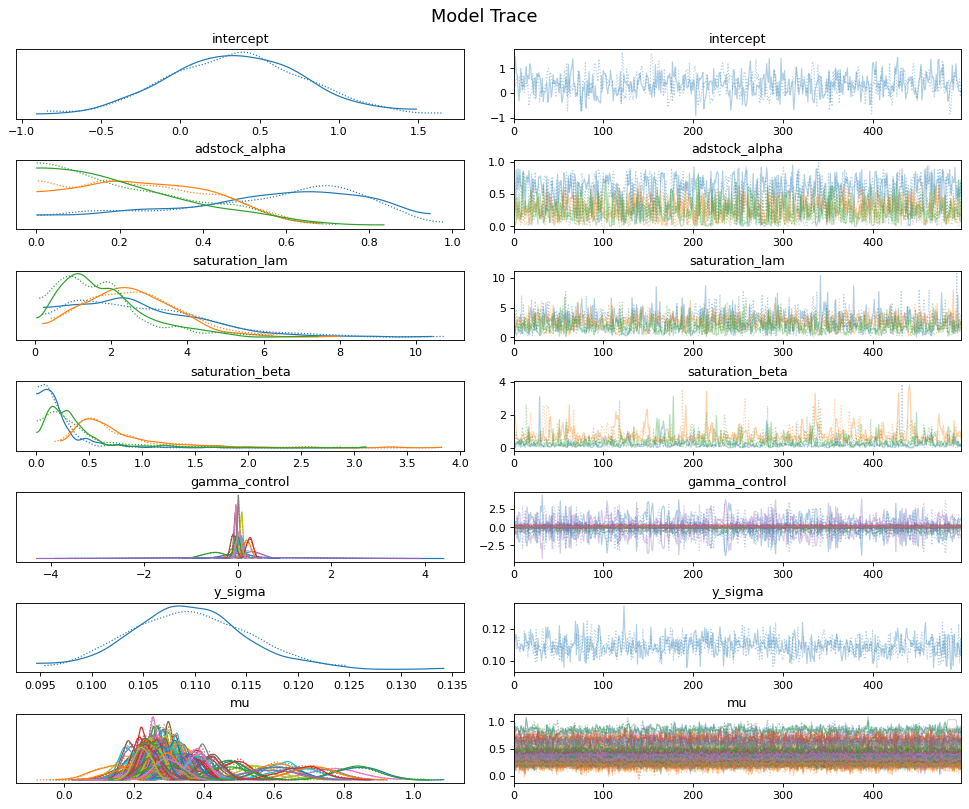

In [84]:
_ = az.plot_trace(
    data=mmm.fit_result,
    var_names=[
        "intercept",
        "adstock_alpha",
        "saturation_lam",
        "saturation_beta",
        "gamma_control",
        "y_sigma",
        "mu"
    ],
    compact=True,
    backend_kwargs={"figsize": (12, 10), "layout": "constrained"},
)
plt.gcf().suptitle("Model Trace", fontsize=16)
plt.legend();

In [86]:
mmm.sample_posterior_predictive(
    df[["wk_strt_dt"]+cols_spend+control_cols], original_scale=True, extend_idata=True, combined=True
)

Sampling: [y]


Output()

<xarray.Dataset> Size: 2MB
Dimensions:  (date: 209, sample: 1000)
Coordinates:
  * date     (date) datetime64[ns] 2kB 2014-08-03 2014-08-10 ... 2018-07-29
  * sample   (sample) object 8kB MultiIndex
  * chain    (sample) int64 8kB 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1
  * draw     (sample) int64 8kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
Data variables:
    y        (date, sample) float64 2MB 0.199 0.3287 0.2894 ... 0.3333 0.1401
Attributes:
    created_at:                 2025-12-22T08:58:18.466902+00:00
    arviz_version:              0.23.0
    inference_library:          pymc
    inference_library_version:  5.26.1

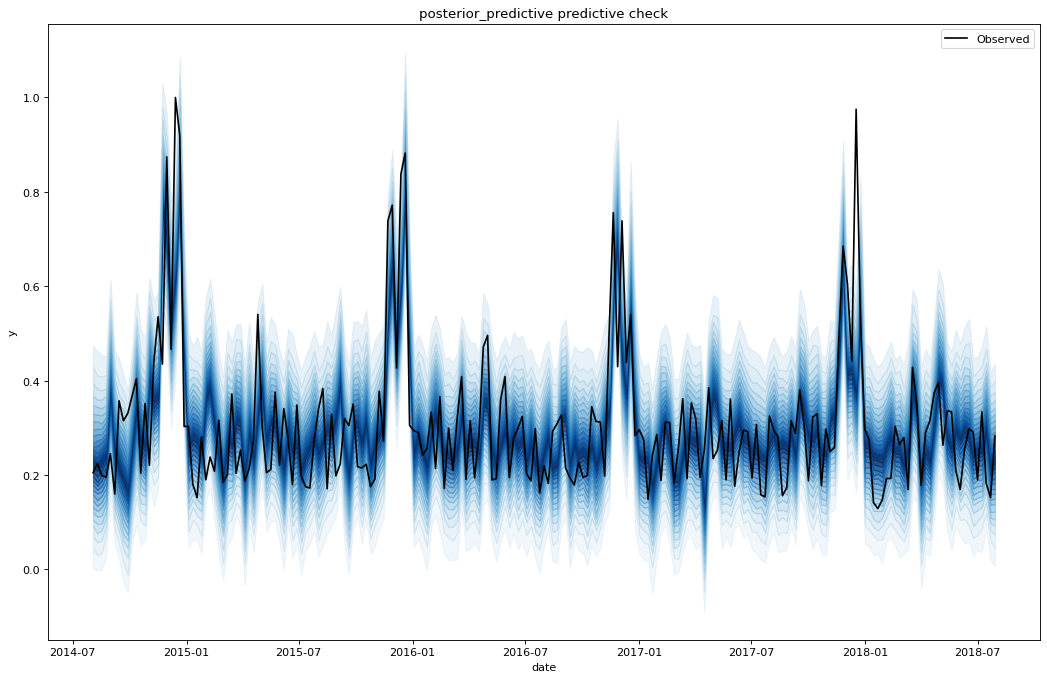

In [98]:
mmm.plot_posterior_predictive(original_scale=True, add_mean=False, add_gradient=True, figsize=(16, 10));

In [ ]:
# mmm.plot_errors());

SyntaxError: unmatched ')' (2811219044.py, line 1)